## Chess game prediction | Lichess games

Since I did my individual challenge on reinforcement learning it was difficult to show the learning outcome for **data preparation.** This is why I am doing this little side project to try and still prove this learning outcome.

In this Notebook I will attempt to take a dataset with 'random' chess games played online on the website lichess.org and try to predict the output of a given game.

### Looking at the data

I got the dataset from Kaggle, but the user that posted it mentioned that he scraped the data with the Lichess API.

At first I will take a look at the dataset in various ways to get an idea of the available features.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# TODO: figure out why every consultant uses this matplotlib inline
%matplotlib inline

df_unchanged = pd.read_csv('./data/games.csv')
print(df_unchanged.info())

def log_shape(df_to_log):
    row_count, col_count= df_to_log.shape
    print(f'\nThe dataset has {row_count} rows and {col_count} columns\n')

log_shape(df_unchanged)
df_unchanged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
None

The 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Also going to look at the tail and a sample to see if anything is out of the ordinary

In [2]:
df_unchanged.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [3]:
df_unchanged.sample(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11579,hYdVY5b5,True,1.504069e+12,1.504070e+12,71,resign,white,10+0,krishna06,1875,mikailmalik,1433,g3 g6 Bg2 Bg7 d4 Nh6 Nf3 O-O O-O d6 c4 c6 Nc3 ...,A00,Hungarian Opening: Symmetrical Variation,2
3291,QFmMrAFq,False,1.485280e+12,1.485280e+12,25,resign,white,15+0,ruichess,1459,sollids,1704,e4 e5 Nf3 Nc6 Bb5 a6 Bxc6 dxc6 d4 exd4 Nxd4 c5...,C68,Ruy Lopez: Exchange Variation,7
19351,t69kqnWh,True,1.500675e+12,1.500675e+12,2,resign,black,15+15,adcz,1728,dumbluck,2012,e4 Nc6,B00,Nimzowitsch Defense,2
5592,JS6K3t4g,False,1.498930e+12,1.498930e+12,78,resign,black,5+8,riverroad,1525,batigol5,1533,d4 d5 Nf3 e6 e3 a6 Bd3 h6 Nbd2 Nc6 O-O Bd7 c3 ...,D02,Queen's Pawn Game: Zukertort Variation,3
5101,6LneNPrY,True,1.475890e+12,1.475890e+12,62,resign,black,5+5,sleepez,2045,marbo,1750,e4 Nc6 Nf3 d5 exd5 Qxd5 Nc3 Qa5 Be2 Nf6 O-O Bg...,B00,Nimzowitsch Defense | Declined Variation,3


In [4]:
df_unchanged.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


I did not find anything too weird, but a few interesting featuers about the dataset are
- The Id is just a random guid generated by the lichess website to mark the game
- I can't say if created at and last move are usefull especially because the notebook shows them in scientific notation
- The time control is given as a string, I could possibly split this up in a time and increment field. With both of them being numbers.
- The victory status gives away if a game is drawn or not, which would spoil the prediction. It is also a metric that only would be available after a game and can therefore not be used to predict an outcome of an unfinished gamopee.
- The amount of turns and when the game ended are also obviously data points that would only be available after the game, and cannot be used to predict the result of the game before it is played.
- The white_id and black_id are the usernames of the people that played the game, with their corresponding color.
- Looking at the usernames of the players, atleast some players are in the dataset more than once.
- The dataset include both rated and unrated games.
- The dataset includes the rating of both players, which can be used to create a rating difference column which I expect would hold a high correlation with the result. 
- The dataset does not have any null values
- There are games with only 1 move, which is really weird for a chess game, most likely someone started a game on accident and resigned after a single move was played, or they just wanted to annoy the opposing player.

___
- On Kaggle in the description of the dataset it is mentioned that the Eco code corresponds to a specific opening, which can be referenced from a lookup table. These codes could be useful as they are way easier to compare than the string values in the opening name column.
https://www.365chess.com/eco/A00 This url is an example that could be used to find the opening that corresponds with the eco code.

- The created_at and last_move_at seem to be in epoch time / unix timestamp according to the Lichess API. Which I confirmed by trying to put the first timestamp of last_move_at in an online epoch converter tool.

<img alt="Epoch Converter" src="https://i.imgur.com/4Gs6GKT.png" width="65%" />


### Unique values

Next I am going to look at the unique values for the string columns to see the possible values for these columns and the amount of unique values.

In [5]:
row_count = df_unchanged.shape[0]
cols_to_check = ['opening_name', 'opening_eco', 'increment_code', 'victory_status', 'winner', 'white_id', 'black_id']
# Unique info holds the following:
# key: col-name value: arr with the following at their corresponding index: 
    #0 - list of unique values | 1 - amount of unique values | 2 - percent of unique values
unique_info = {}
for col in cols_to_check:
    info = df_unchanged[col].unique()
    unique_info.update({col: (info, len(info), len(info) / row_count * 100)})    
    print(f'column: {col} | unique values: {len(info)} | sample:{info[:min(len(info), 5)]} | unique percentage {round(unique_info.get(col)[2], 2)}% \n')  ## 

unique_players = pd.concat([df_unchanged['white_id'], df_unchanged['black_id']]).unique()
print(f'{len(unique_players)} unique players out of {row_count}, which is {round(len(unique_players) / row_count * 100 ,2)}% unique')
print(f'{row_count - len(unique_players)} duplicate players out of {row_count}, which is {round((row_count - len(unique_players)) / row_count * 100 ,2)}% unique')


column: opening_name | unique values: 1477 | sample:['Slav Defense: Exchange Variation'
 'Nimzowitsch Defense: Kennedy Variation'
 "King's Pawn Game: Leonardis Variation"
 "Queen's Pawn Game: Zukertort Variation" 'Philidor Defense'] | unique percentage 7.36% 

column: opening_eco | unique values: 365 | sample:['D10' 'B00' 'C20' 'D02' 'C41'] | unique percentage 1.82% 

column: increment_code | unique values: 400 | sample:['15+2' '5+10' '20+0' '30+3' '10+0'] | unique percentage 1.99% 

column: victory_status | unique values: 4 | sample:['outoftime' 'resign' 'mate' 'draw'] | unique percentage 0.02% 

column: winner | unique values: 3 | sample:['white' 'black' 'draw'] | unique percentage 0.01% 

column: white_id | unique values: 9438 | sample:['bourgris' 'a-00' 'ischia' 'daniamurashov' 'nik221107'] | unique percentage 47.05% 

column: black_id | unique values: 9331 | sample:['a-00' 'skinnerua' 'adivanov2009' 'franklin14532' 'daniel_likes_chess'] | unique percentage 46.52% 

15635 unique pl

So even though there are duplicate players in the dataset, it is not probably not a huge problem, because there are still around 15000 different players in the data.

300 Value sfor the opening eco seems too much too hot encode, should I map to regular integers instead? Should I try both?

### Derived columns

I am going to create columns that can be derived from the existing columns on the dataset. 
The increment code will be split up in time in minutes and increment in seconds and they will be transformed to integers so they can be used, since pandas sees the current increment_code as an object or string data.

I am also going to create a rating difference column and absolute ratings column. The absolute value will make it impossible to see what player has the rating difference wich might grant different results. I make the columns now So that I have them during the rest of the analysis and can use them if needed.

In [6]:
df = df_unchanged.copy()

df['rating_difference_abs'] = abs(df['black_rating'] - df['white_rating'])

df['rating_difference'] = df['black_rating'] - df['white_rating']

format_cols = ['format_mins', 'format_increment']
df[format_cols] = df['increment_code'].str.split('+', 1, expand=True)
df[format_cols] = df[format_cols].apply(pd.to_numeric)
format_cols.extend(['increment_code','black_rating', 'white_rating', 'rating_difference', 'rating_difference_abs'])
df[format_cols].sample(2)


,format_mins,format_increment,increment_code,black_rating,white_rating,rating_difference,rating_difference_abs
1897,10,0,10+0,2125,1486,639,639
1968,30,0,30+0,1500,1091,409,409


### Dealing with non number columns

In my understanding the columns that could be used as features or will be used in the analysis have to be numeric values to show up in the metrics or be used when training the machine learning model. So for this reason I am going to deal with the non numeric columns next. I am placing the adjusted column in a new column prefixed with '_num' to keep the old columns for clarity.


In [7]:
# Mapping string to numeric data
def create_mapped_col(str_col: str, num_col: str = ''):
    num_col = str_col + '_num' if num_col == '' else num_col
    mapping = {}
    print(f'mapping string values to numeric for {str_col}')
    for i in range(unique_info.get(str_col)[1]):
        str_val = unique_info.get(str_col)[0][i]
        print(f'mapping {str_val} to {i}')
        mapping.update({str_val: i})
    print('\n')
    df[num_col] = df[str_col].map(mapping).astype(int)
    df['rated_num'] = df['rated'].astype(int)
         
create_mapped_col('winner')
create_mapped_col('victory_status')
create_mapped_col('opening_eco')

    


mapping string values to numeric for winner
mapping white to 0
mapping black to 1
mapping draw to 2


mapping string values to numeric for victory_status
mapping outoftime to 0
mapping resign to 1
mapping mate to 2
mapping draw to 3


mapping string values to numeric for opening_eco
mapping D10 to 0
mapping B00 to 1
mapping C20 to 2
mapping D02 to 3
mapping C41 to 4
mapping B27 to 5
mapping D00 to 6
mapping C50 to 7
mapping B01 to 8
mapping A00 to 9
mapping C02 to 10
mapping C00 to 11
mapping C57 to 12
mapping C55 to 13
mapping A40 to 14
mapping B20 to 15
mapping A25 to 16
mapping B21 to 17
mapping D01 to 18
mapping C45 to 19
mapping D06 to 20
mapping B52 to 21
mapping D20 to 22
mapping B06 to 23
mapping A45 to 24
mapping B77 to 25
mapping A21 to 26
mapping B70 to 27
mapping B23 to 28
mapping B76 to 29
mapping C21 to 30
mapping A80 to 31
mapping A20 to 32
mapping A04 to 33
mapping C26 to 34
mapping C44 to 35
mapping E10 to 36
mapping A41 to 37
mapping C01 to 38
mapping A10 to 39
mappin

Showing the new numeric columns

In [8]:
df[[
    'opening_eco', 'opening_eco_num',
    'winner', 'winner_num',
    'victory_status', 'victory_status_num',
    'rated', 'rated_num']].sample(5)

,opening_eco,opening_eco_num,winner,winner_num,victory_status,victory_status_num,rated,rated_num
12841,D02,3,black,1,mate,2,True,1
9176,B02,54,white,0,mate,2,False,0
3263,B00,1,white,0,mate,2,False,0
11953,A06,90,black,1,outoftime,0,False,0
12363,B12,81,white,0,outoftime,0,True,1


I am mapping the created and last move at columns to a duration column so there is a smaller value to work with that Jupyter won't write in scientific notation. This shows that the time columns are actually working, since we can see columns that have a duration longer than 0.

In [9]:
df['duration'] = df['last_move_at'] - df['created_at']
print(df['duration'].describe())
print(f"Min duration in ms: {df['duration'].min()} | Max duration in hours {df['duration'].max() / 1000 / 3600}")
df.loc[df['duration'] > 0, ['duration']].sample(3)

count    2.005800e+04
mean     8.697070e+05
std      4.814222e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.406120e+05
75%      7.931712e+05
max      6.058447e+08
Name: duration, dtype: float64
Min duration in ms: 0.0 | Max duration in hours 168.29019472222222


,duration
14178,276267.0
13223,712673.0
13504,1226290.0


### Correlations

Now that I have the numeric columns I am going to try and get a first indication of the possible correlations with the column that we try to predict (Winner). 

The heatmap doesn't show any real correlations between the winner column and the other columns.
The highest correlation is from the rating difference, which was to be expected, since a higher rated opponent is likely to beat the lower rated one.

-0.03
0.3


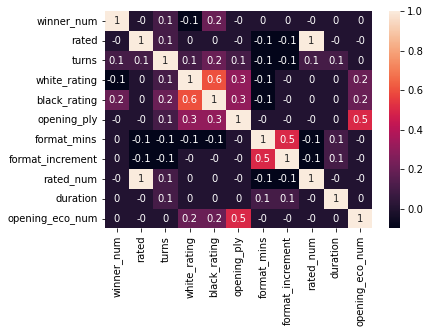

In [10]:
def get_correlation(col_a: str, col_b: str = 'winner_num'):
    return round(df[col_a].corr(df[col_b]), 2)

print(get_correlation('rating_difference_abs'))
print(get_correlation('rating_difference'))

to_check_corr = ['winner_num','rated', 'turns', 'white_rating', 'black_rating', 'opening_ply', 
                 'format_mins', 'format_increment', 'rated_num', 'duration', 'opening_eco_num']

corr_matrix = df[to_check_corr].corr().apply(lambda x: round(x, 1))
sn.heatmap(corr_matrix, annot=True)
plt.style.use("seaborn-bright")
plt.show()

### Potential outliers

For the potential outliers I am going to look at the boxplots to see what the values of the potential outliers are and how many outliers there are.

<AxesSubplot:>

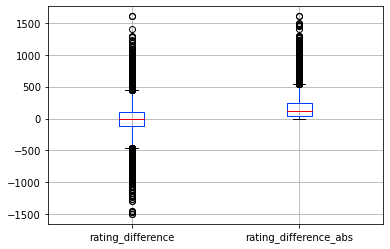

In [11]:
# Todo, there might be a cleaner way of doing the boxplots
df.boxplot(column=['rating_difference', 'rating_difference_abs'])

The high rating difference means the game is likely not being played in the pool, removing the unrated games from the dataset should show way less potential outliers for this statistic, as this high of a rating difference only occurs in arenas or unrated for fun games.

<AxesSubplot:>

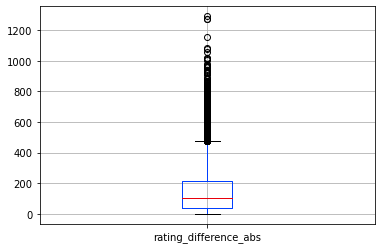

In [12]:
df_rated_only = df.loc[df['rated'] == True]
df_rated_only.sample(5)
df_rated_only.boxplot(column=['rating_difference_abs'])

This is not what I expected at all. There are still a lot of outliers. It doesn't go to the 1500 range anymore, but it has a lot of rating differences up to a 1000 with a few around 1200. Which is still a huge rating difference.

<AxesSubplot:>

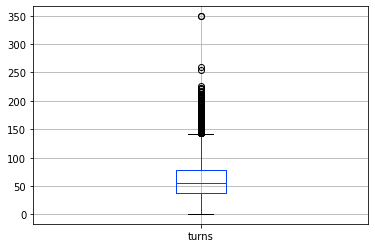

In [13]:
df.boxplot(column=['turns'])

It is weird that it doesn't show the games with only 1  turn as an outlier since it is impossible to lose a game of chess in a single turn. 

<AxesSubplot:>

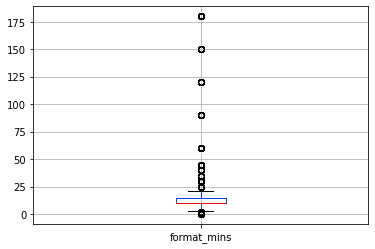

In [14]:
df.boxplot(column=['format_mins'])

<AxesSubplot:>

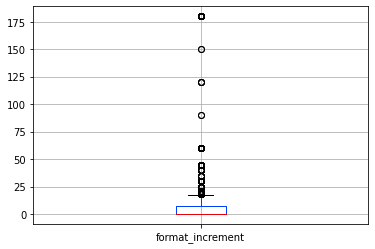

In [15]:
df.boxplot(column=['format_increment'])

<AxesSubplot:>

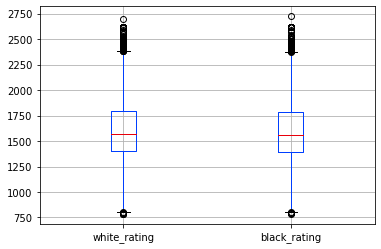

In [16]:
df.boxplot(column=['white_rating', 'black_rating'])

The next steps:

Feature selection and outlier removal

There are a lot of different time controls included in the dataset, but I enjoy the 'rapid' time control the most which are the games between 10 and 15 minutes.

In [17]:
df.groupby(['format_mins'])['format_mins'].count()

format_mins
0        45
1        31
2        55
3        57
4        65
5      1795
6       176
7       661
8       924
9       261
10     9456
11       98
12      225
13       74
14       70
15     3382
16       49
17       40
18       26
19       28
20      936
21        1
25      322
29        2
30      746
35       26
40       37
45      158
60      103
90       26
120      16
150      13
180     154
Name: format_mins, dtype: int64

In [18]:
df.groupby(['format_increment'])['format_increment'].count()

format_increment
0      11098
1        234
2        657
3        456
4        168
5       2068
6        185
7        181
8       1220
9        112
10      1401
11        28
12        87
13        16
14        59
15      1167
16        26
17        30
18        11
19         7
20       125
21         6
25        62
30       297
35         7
40        41
45       107
60       105
90         2
120        4
150        2
180       89
Name: format_increment, dtype: int64

In [19]:
df.groupby(['rated'])['rated'].count()

rated
False     3903
True     16155
Name: rated, dtype: int64

This is also interesting as to my knowledge the most popular time control to play online by far is 3 minutes, which would make sense to have more entries, as these games take less time meaning that players could play more 3 minutes games in the time they would play a single longer game. However this dataset appears to have the most data on 10 and 15 minute games.

[This](https://lichess.org/forum/lichess-feedback/lichess-time-controls-popularity-using-hours-graph) article also suggests that 3 minute chess should theoretically have more games than 10 minute chess, since the graph portrais hours played and not the amount of games.

But as expected there are a lot more rated games than unrated games, because by default the games you select in the start screen of lichess are rated games.

### Feature selection

For the dataset that will be used for training I am removing all games that do not fit the timeframe of being between 10 and 15 minutes, because I want to do my predictions for rapid games.

More than 30 seconds of increment is also pretty unusual to my knowledge and according to the dataset so I also remove games with a longer increment from the dataset.

Since a game of chess is not loseable in a single turn I remove the games with only a single move played.

I also exclude the games that were shorter than 10 seconds, because something really odd must have happened if you lose withing 10 seconds when you start with 10 to 15 minutes on the clock.


In [20]:
to_select = ['rated_num', 'opening_eco_num',
#                 'white_rating', 'black_rating',
                'turns', 'duration', 'opening_ply', 
                'format_mins', 'format_increment', 'winner_num']
df_select = df[to_select]

# Removing outliers
df_select = df_select.loc[(df_select['format_mins'] >= 10) & (df_select['format_mins'] <= 15)]
df_select = df_select.loc[df_select['format_increment'] <= 30]
df_select = df_select.loc[(df_select['turns'] > 1) & (df_select['turns'] <= 100)]
df_select = df_select.loc[df_select['duration'] > 10_000]

df_select.sample(4)


,rated_num,opening_eco_num,turns,duration,opening_ply,format_mins,format_increment,winner_num
15547,1,49,55,972835.0,4,10,0,0
15889,1,46,34,206840.0,5,10,0,1
13062,0,33,25,91484.0,2,10,1,0
13450,1,128,69,616674.0,9,10,0,0


Next up is randomly splitting the data in test and training data.

In [21]:
from sklearn.model_selection import train_test_split

to_predict = 'winner_num'
if to_predict in to_select:
    to_select.remove(to_predict)
X = df_select[to_select]
y = df_select[to_predict]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn import tree
from sklearn.metrics import accuracy_score

# Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)

print(f'accuracy: {round(acc*100,2)}%')

accuracy: 76.33%
